In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

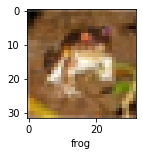

In [10]:
plot_sample(X_train, y_train, 0)

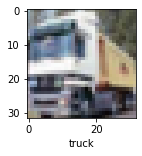

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples
Epoch 1/5
50000/50000 [==============================] - 117s 2ms/sample - loss: 1.8551 - acc: 0.3384
Epoch 2/5
50000/50000 [==============================] - 115s 2ms/sample - loss: 1.6536 - acc: 0.4137
Epoch 3/5
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.5688 - acc: 0.4462
Epoch 4/5
50000/50000 [==============================] - 112s 2ms/sample - loss: 1.5067 - acc: 0.4675
Epoch 5/5
50000/50000 [==============================] - 113s 2ms/sample - loss: 1.4563 - acc: 0.4866


In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.58      0.42      0.49      1000
           1       0.73      0.43      0.54      1000
           2       0.35      0.22      0.27      1000
           3       0.28      0.32      0.30      1000
           4       0.49      0.24      0.33      1000
           5       0.21      0.62      0.32      1000
           6       0.43      0.67      0.53      1000
           7       0.63      0.41      0.50      1000
           8       0.77      0.41      0.53      1000
           9       0.62      0.47      0.54      1000

    accuracy                           0.42     10000
   macro avg       0.51      0.42      0.43     10000
weighted avg       0.51      0.42      0.43     10000



In [15]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [16]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
cnn.fit(X_train, y_train, epochs=10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 43s 856us/sample - loss: 1.4782 - acc: 0.4654
Epoch 2/10
50000/50000 [==============================] - 42s 842us/sample - loss: 1.1174 - acc: 0.6082
Epoch 3/10
50000/50000 [==============================] - 41s 826us/sample - loss: 0.9833 - acc: 0.6579
Epoch 4/10
50000/50000 [==============================] - 43s 853us/sample - loss: 0.8969 - acc: 0.6879
Epoch 5/10
50000/50000 [==============================] - 42s 840us/sample - loss: 0.8340 - acc: 0.7085
Epoch 6/10
50000/50000 [==============================] - 43s 854us/sample - loss: 0.7796 - acc: 0.7289 - loss: 0.7793 - acc: 
Epoch 7/10
50000/50000 [==============================] - 43s 859us/sample - loss: 0.7327 - acc: 0.7428
Epoch 8/10
50000/50000 [==============================] - 49s 970us/sample - loss: 0.6875 - acc: 0.7599 - loss: 0.6873 - acc
Epoch 9/10
50000/50000 [==============================] - 49s 978us/sample - loss: 0.6457 - acc: 0.77

In [18]:
cnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 324us/sample - loss: 0.9425 - acc: 0.6947


[0.9424987787246704, 0.6947]

In [19]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.2703801e-04, 1.5378519e-04, 6.4017340e-03, 8.5628814e-01,
        4.6699628e-04, 6.1895702e-02, 1.5496719e-03, 6.3085119e-04,
        7.2124608e-02, 2.6155973e-04],
       [7.9187721e-01, 1.1322976e-01, 4.4938297e-06, 1.6751740e-07,
        4.4231615e-07, 1.5185056e-07, 4.0964962e-10, 3.0472755e-08,
        9.4645269e-02, 2.4231507e-04],
       [8.6215951e-02, 4.1507252e-02, 6.7766529e-04, 2.8818536e-03,
        2.0351275e-04, 3.9451302e-04, 1.0382293e-05, 1.6754135e-03,
        8.4432781e-01, 2.2105660e-02],
       [9.6357828e-01, 2.2174739e-03, 7.3309778e-03, 2.9478435e-04,
        1.1985795e-04, 2.9379080e-06, 6.3195498e-06, 7.5734215e-04,
        2.5032252e-02, 6.5983739e-04],
       [3.5202349e-06, 3.4923789e-05, 2.1434179e-02, 1.0822906e-01,
        7.3351532e-01, 9.5564015e-03, 1.2691700e-01, 2.5080321e-06,
        2.9988802e-04, 7.0944679e-06]], dtype=float32)

In [20]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 0, 8, 0, 4]

In [21]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

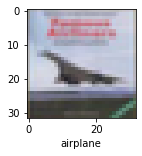

In [22]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'

In [24]:
classes[y_classes[3]]

'airplane'